# Hyperparameters

Consider the Booth test function (below). This function varies differently in different directions, and these directions are somewhat skewed with respect to the inputs. Our agent will automatically fit the right hyperparameters to account for this.

Text(0, 0.5, 'x2')

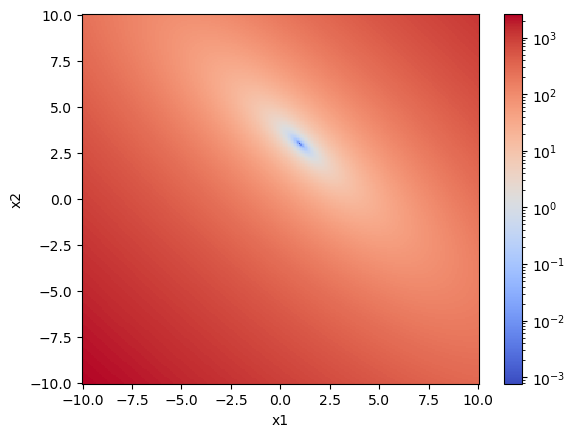

In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from bloptools import test_functions

x1 = x2 = np.linspace(-10, 10, 256)
X1, X2 = np.meshgrid(x1, x2)

F = test_functions.booth(X1, X2)

plt.pcolormesh(x1, x2, F, norm=mpl.colors.LogNorm(), shading="auto")
plt.colorbar()
plt.xlabel("x1")
plt.ylabel("x2")

The optimization goes faster if our model understands how the function changes as we change the inputs in different ways. The way it picks up on this is by starting from a general model that could describe a lot of functions, and making it specific to this one by choosing the right hyperparameters. Our Bayesian agent is very good at this, and only needs a few samples to figure out what the function looks like:

In [2]:
def digestion(db, uid):
    products = db[uid].table()

    for index, entry in products.iterrows():
        products.loc[index, "booth"] = test_functions.booth(entry.x1, entry.x2)

    return products



Transient Scan ID: 1     Time: 2023-08-11 02:23:52
Persistent Unique Scan ID: '3442324e-97d7-49ca-83cc-8140f557ff55'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 02:23:52.2 |      3.891 |     -1.519 |
|         2 | 02:23:52.2 |     -4.863 |      4.112 |
|         3 | 02:23:52.2 |     -1.880 |     -3.838 |
|         4 | 02:23:52.2 |      1.875 |      1.782 |
|         5 | 02:23:52.2 |      0.848 |     -3.337 |
|         6 | 02:23:52.2 |     -0.404 |      1.046 |
|         7 | 02:23:52.2 |     -2.743 |     -0.692 |
|         8 | 02:23:52.2 |      3.509 |      3.675 |
|         9 | 02:23:52.2 |      3.081 |     -4.405 |
|        10 | 02:23:52.2 |     -3.165 |      2.477 |
|        11 | 02:23:52.2 |     -1.148 |     -2.035 |
|        12 | 02:23:52.2 |      0.098 |      4.833 |
|        13 | 02:23:52.2 |      2.218 |     -0.129 |
|        14

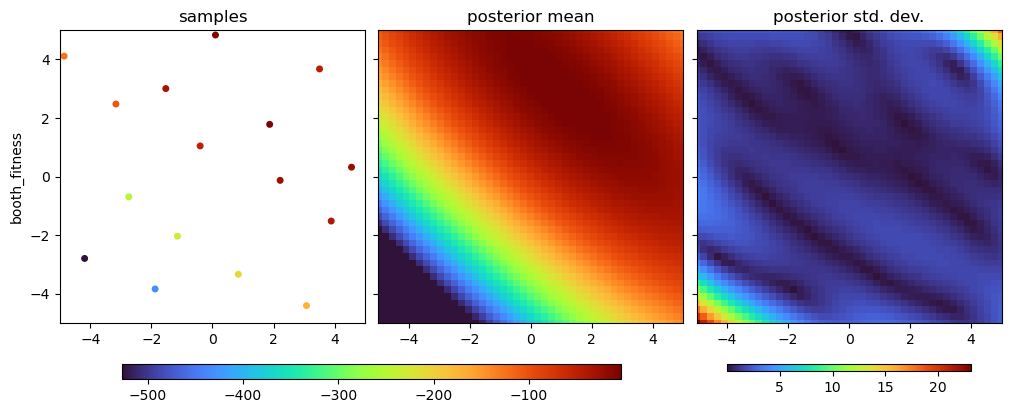

In [3]:
%run -i ../../../examples/prepare_bluesky.py # prepare the bluesky environment

from bloptools import devices
from bloptools.bayesian import Agent

dofs = [
    {"device": devices.DOF(name="x1"), "limits": (-5, 5), "kind": "active"},
    {"device": devices.DOF(name="x2"), "limits": (-5, 5), "kind": "active"},
]

tasks = [
    {"key": "booth", "kind": "minimize"},
]

agent = Agent(
    dofs=dofs,
    tasks=tasks,
    digestion=digestion,
    db=db,
)

RE(agent.initialize(acq_func="qr", n_init=16))

agent.plot_tasks()

In addition to modeling the fitness of the task, the agent models the probability that an input will be feasible:

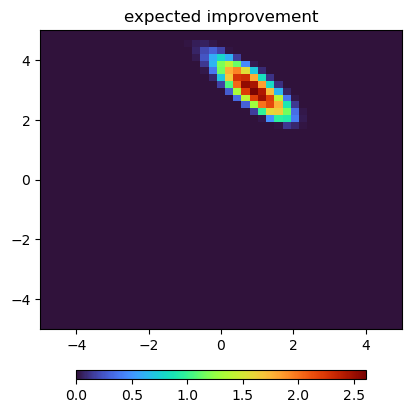

In [4]:
agent.plot_acquisition(strategy=["ei", "pi", "ucb"])



Transient Scan ID: 2     Time: 2023-08-11 02:23:55
Persistent Unique Scan ID: 'f568f81c-03f3-4aa4-8a01-750fddf22b9b'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 02:23:55.5 |      0.911 |      2.996 |
+-----------+------------+------------+------------+
generator list_scan ['f568f81c'] (scan num: 2)







Transient Scan ID: 3     Time: 2023-08-11 02:23:57
Persistent Unique Scan ID: '64f6aabe-0aad-4594-9b58-16ac8ddd7437'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 02:23:57.0 |      0.741 |      3.070 |
+-----------+------------+------------+------------+
generator list_scan ['64f6aabe'] (scan num: 3)







Transient Scan ID: 4     Time: 2023-08-11 02:23:58
Persistent Unique Scan ID: '08b5e57b-5fbc-4b11-ac65-48338c68a2b2'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 02:23:58.0 |      5.000 |      5.000 |
+-----------+------------+------------+------------+
generator list_scan ['08b5e57b'] (scan num: 4)







Transient Scan ID: 5     Time: 2023-08-11 02:23:59
Persistent Unique Scan ID: '9fde2bfe-f0af-434f-bb53-f4e9f41daf4e'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 02:23:59.6 |      1.007 |      2.988 |
+-----------+------------+------------+------------+
generator list_scan ['9fde2bfe'] (scan num: 5)





/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/optim/fit.py:130: OptimizationWarning: `scipy_minimize` terminated with status 3, displaying original message from `scipy.optimize.minimize`: ABNORMAL_TERMINATION_IN_LNSRCH
  warn(




Transient Scan ID: 6     Time: 2023-08-11 02:24:02
Persistent Unique Scan ID: '8c3a6f15-a887-4438-a3af-0809d3b44627'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 02:24:02.0 |      0.966 |      3.041 |
+-----------+------------+------------+------------+
generator list_scan ['8c3a6f15'] (scan num: 6)







Transient Scan ID: 7     Time: 2023-08-11 02:24:03
Persistent Unique Scan ID: 'd1324e3b-947b-4063-b410-f0de153fbe55'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 02:24:03.5 |      1.006 |      3.000 |
+-----------+------------+------------+------------+
generator list_scan ['d1324e3b'] (scan num: 7)





/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/optim/fit.py:130: OptimizationWarning: `scipy_minimize` terminated with status 3, displaying original message from `scipy.optimize.minimize`: ABNORMAL_TERMINATION_IN_LNSRCH
  warn(


/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/optim/fit.py:130: OptimizationWarning: `scipy_minimize` terminated with status 3, displaying original message from `scipy.optimize.minimize`: ABNORMAL_TERMINATION_IN_LNSRCH
  warn(


/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/botorch/optim/fit.py:130: OptimizationWarning: `scipy_minimize` terminated with status 3, displaying original message from `scipy.optimize.minimize`: ABNORMAL_TERMINATION_IN_LNSRCH
  warn(




Transient Scan ID: 8     Time: 2023-08-11 02:24:06
Persistent Unique Scan ID: 'bf578489-e3c7-4b5d-9948-c37265ecb0a6'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 02:24:06.5 |      0.994 |      3.003 |
+-----------+------------+------------+------------+
generator list_scan ['bf578489'] (scan num: 8)







Transient Scan ID: 9     Time: 2023-08-11 02:24:07
Persistent Unique Scan ID: 'bef74743-a6d6-4e5c-b5c7-3f3e1e6ddf55'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 02:24:07.8 |      1.011 |      2.989 |
+-----------+------------+------------+------------+
generator list_scan ['bef74743'] (scan num: 9)





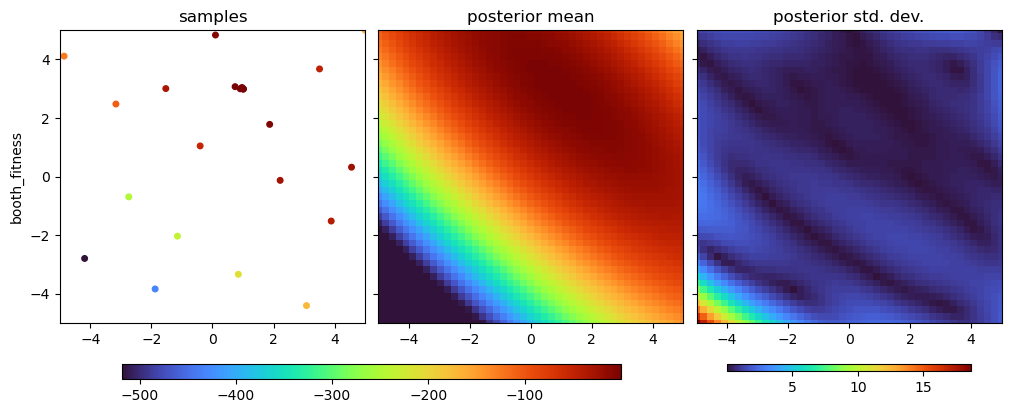

In [5]:
RE(agent.learn("ei", n_iter=8))
agent.plot_tasks()